## Check Buzzard Sample

In [1]:
import numpy as np
from astropy.table import Table, vstack
import healpy as hp

from astropy.io.fits import getdata
from astropy.io import fits as pyfits
import matplotlib.pyplot as plt

In [2]:
## setup
################
Nlarge = 2000 ## Number of GC

zmin = 0.10
zmax = 0.9
mass_min = 1e12
################

In [3]:
outdir = '/global/project/projectdirs/des/jesteves/buzzardSelection/v2.0.0/'

fileprefix = 'buzzard_v2.0.0_{}.fits' 
file_cls   = outdir+fileprefix.format('halos_hod')

In [4]:
cat = Table(getdata(file_cls))

In [6]:
import GCRCatalogs

In [7]:
# List all catalogs whose names start with the word "buzzard"
GCRCatalogs.get_available_catalog_names(include_default_only=False, name_startswith="buzzard")

['buzzard',
 'buzzard_high-res',
 'buzzard_high-res_v1.1',
 'buzzard_test',
 'buzzard_v2.0.0_3',
 'buzzard_v2.0.0_4',
 'buzzard_v2.0.0_test']

In [8]:
gc = GCRCatalogs.load_catalog('buzzard_v2.0.0_3')

In [15]:
print('\n'.join(sorted(gc.list_all_native_quantities())))

auxmag/AMAG/0
auxmag/AMAG/1
auxmag/AMAG/10
auxmag/AMAG/11
auxmag/AMAG/12
auxmag/AMAG/13
auxmag/AMAG/14
auxmag/AMAG/15
auxmag/AMAG/16
auxmag/AMAG/17
auxmag/AMAG/18
auxmag/AMAG/19
auxmag/AMAG/2
auxmag/AMAG/20
auxmag/AMAG/3
auxmag/AMAG/4
auxmag/AMAG/5
auxmag/AMAG/6
auxmag/AMAG/7
auxmag/AMAG/8
auxmag/AMAG/9
auxmag/FLUX/0
auxmag/FLUX/1
auxmag/FLUX/10
auxmag/FLUX/11
auxmag/FLUX/12
auxmag/FLUX/13
auxmag/FLUX/14
auxmag/FLUX/15
auxmag/FLUX/16
auxmag/FLUX/17
auxmag/FLUX/18
auxmag/FLUX/19
auxmag/FLUX/2
auxmag/FLUX/20
auxmag/FLUX/3
auxmag/FLUX/4
auxmag/FLUX/5
auxmag/FLUX/6
auxmag/FLUX/7
auxmag/FLUX/8
auxmag/FLUX/9
auxmag/IVAR/0
auxmag/IVAR/1
auxmag/IVAR/10
auxmag/IVAR/11
auxmag/IVAR/12
auxmag/IVAR/13
auxmag/IVAR/14
auxmag/IVAR/15
auxmag/IVAR/16
auxmag/IVAR/17
auxmag/IVAR/18
auxmag/IVAR/19
auxmag/IVAR/2
auxmag/IVAR/20
auxmag/IVAR/3
auxmag/IVAR/4
auxmag/IVAR/5
auxmag/IVAR/6
auxmag/IVAR/7
auxmag/IVAR/8
auxmag/IVAR/9
auxmag/LMAG/0
auxmag/LMAG/1
auxmag/LMAG/10
auxmag/LMAG/11
auxmag/LMAG/12
auxmag/LMAG/

In [9]:
filterConditions = ['is_central','redshift >= {}'.format(zmin),'redshift <= {}'.format(zmax),
                    'halo_mass >= {}'.format(mass_min)]

column_list = ['ra', 'dec', 'redshift', 'halo_mass', 'halo_id', 'healpix_pixel']
data = gc.get_quantities(column_list, filters=filterConditions, native_filters=['healpix_pixel==42'])

In [10]:
cat2  = Table(data)

In [11]:
hid   = cat['HALOID']
hid2  = cat2['halo_id']

In [12]:
#hid  = np.unique(hid)

In [52]:
import esutil

In [53]:
match = esutil.numpy_util.match(hid2,hid)

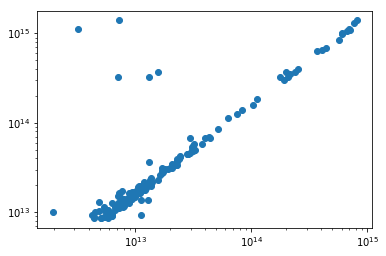

In [54]:
plt.scatter(cat[match[1]]['M200'],cat2[match[0]]['halo_mass'])
plt.xscale('log')
plt.yscale('log')

In [37]:
np.where(cat['hpx8']==42)[0].size

197

In [59]:
## list both native or derived quantities
print('\n'.join(sorted(gc.list_all_quantities(include_native=False))))

Mag_true_H_vista_z0
Mag_true_H_wfirst_z0
Mag_true_J_vista_z0
Mag_true_J_wfirst_z0
Mag_true_K_wfirst_z0
Mag_true_Ks_vista_z0
Mag_true_Y_des_z01
Mag_true_Y_vista_z0
Mag_true_Y_wfirst_z0
Mag_true_Z_vista_z0
Mag_true_g_des_z01
Mag_true_g_lsst_z0
Mag_true_i_des_z01
Mag_true_i_lsst_z0
Mag_true_r_des_z01
Mag_true_r_lsst_z0
Mag_true_u_lsst_z0
Mag_true_y_lsst_z0
Mag_true_z_des_z01
Mag_true_z_lsst_z0
convergence
dec
dec_true
ellipticity
ellipticity_1
ellipticity_1_true
ellipticity_2
ellipticity_2_true
ellipticity_true
galaxy_id
halo_id
halo_mass
is_central
mag_H_vista
mag_H_wfirst
mag_J_vista
mag_J_wfirst
mag_K_wfirst
mag_Ks_vista
mag_Y_des
mag_Y_vista
mag_Y_wfirst
mag_Z_vista
mag_g
mag_g_des
mag_g_lsst
mag_i
mag_i_des
mag_i_lsst
mag_r
mag_r_des
mag_r_lsst
mag_true_H_vista
mag_true_H_wfirst
mag_true_J_vista
mag_true_J_wfirst
mag_true_K_wfirst
mag_true_Ks_vista
mag_true_Y_des
mag_true_Y_vista
mag_true_Y_wfirst
mag_true_Z_vista
mag_true_g
mag_true_g_des
mag_true_g_lsst
mag_true_i
mag_true_i_des
ma

In [55]:
indir = '/global/project/projectdirs/des/jesteves/buzzardSelection/v2.0.0/subsample/'
infile_gal  = indir+'buzzard_v2.0.0_443_members.fits'

In [56]:
gal = Table(getdata(infile_gal))

In [69]:
h = 0.7
amagMax = -18
cut = 'Mag_true_r_des_z01<= %.1f'%(amagMax - 5*np.log10(h))

In [70]:
cut

'Mag_true_r_des_z01<= -17.2'

In [ ]:
data = gc.get_quantities(column_list, filters=cut, native_filters=['healpix_pixel==443'])

In [63]:
gal

hpx8,ID,HALOID,RA,DEC,z_true,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MAG_AUTO_Z,MAGERR_AUTO_G,MAGERR_AUTO_R,MAGERR_AUTO_I,MAGERR_AUTO_Z,FLAGS_GOLD,Mr,RHALO,CENTRAL
int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
443,81000000076.0,4886432,164.72178927644075,27.011872958693562,0.1849968303383225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-21.620825053362513,0.0,1.0
443,81000000298.0,7261403,165.68352111073858,27.55730196138192,0.06087374013645752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-21.195670931493094,0.0,1.0
443,81000000461.0,4889133,165.79444514490615,27.441599983697124,0.18987704288910678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-20.932448710520635,0.0,1.0
443,81000000727.0,7261578,165.71336302631266,27.102102429470587,0.06726471169799504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-21.546660131587746,0.0,1.0
443,81000000730.0,4888897,164.7580928911986,26.599431426090298,0.18463571265268305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-21.023568415568953,0.0,1.0
443,81000000739.0,4885855,165.09699164964397,26.871814505313026,0.181047599048809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-21.097454139218694,0.0,1.0
443,81000000776.0,5209754,165.00782215820735,26.769550811731936,0.2097341583272273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-20.395927939135017,0.0,1.0
443,81000000852.0,4885848,165.04048983191706,26.900569957969907,0.18186014427224725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-20.701457236270503,0.0,1.0
443,81000000982.0,4871210,164.76330138756222,26.595642625775806,0.13553720043566567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-21.688721410839758,0.0,1.0
